# Understand Business Objective

*  Predict future sales based on hisorical data provided. Data contains 1115 stores.
*   Objective is to predict sales based on:
> * Customer detils
> * Store details
> * Time periods
> *  Promotions
> * Holidays
> * Competentions
> * Assortment




# Import Libraries and Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Import Slaes Training Data

In [ ]:
#Import datasets and preview first 5 rows
sales_train_df=pd.read_csv('/content/train.csv')
sales_train_df.head()

<ipython-input-2-ef41e145baba>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df=pd.read_csv('/content/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#Preview the tail
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
#Check the info of the datset
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#Get the summary of the data
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Import the store information data

In [ ]:
#Import and preview
store_df=pd.read_csv('/content/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#check the tail
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
#Understand the info of the dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Get the summary of the data
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# EDA on Train Data

<Axes: >

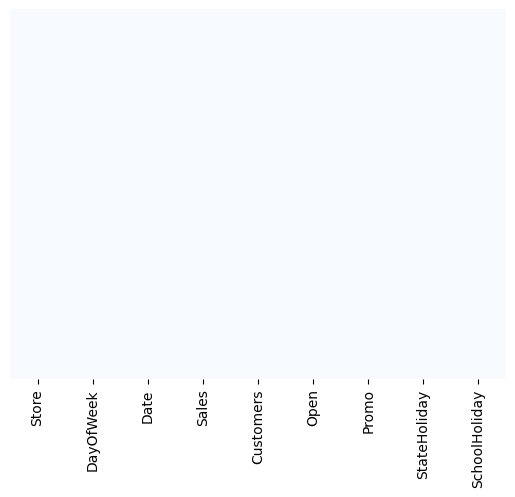

In [ ]:
#lets check for missing data
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

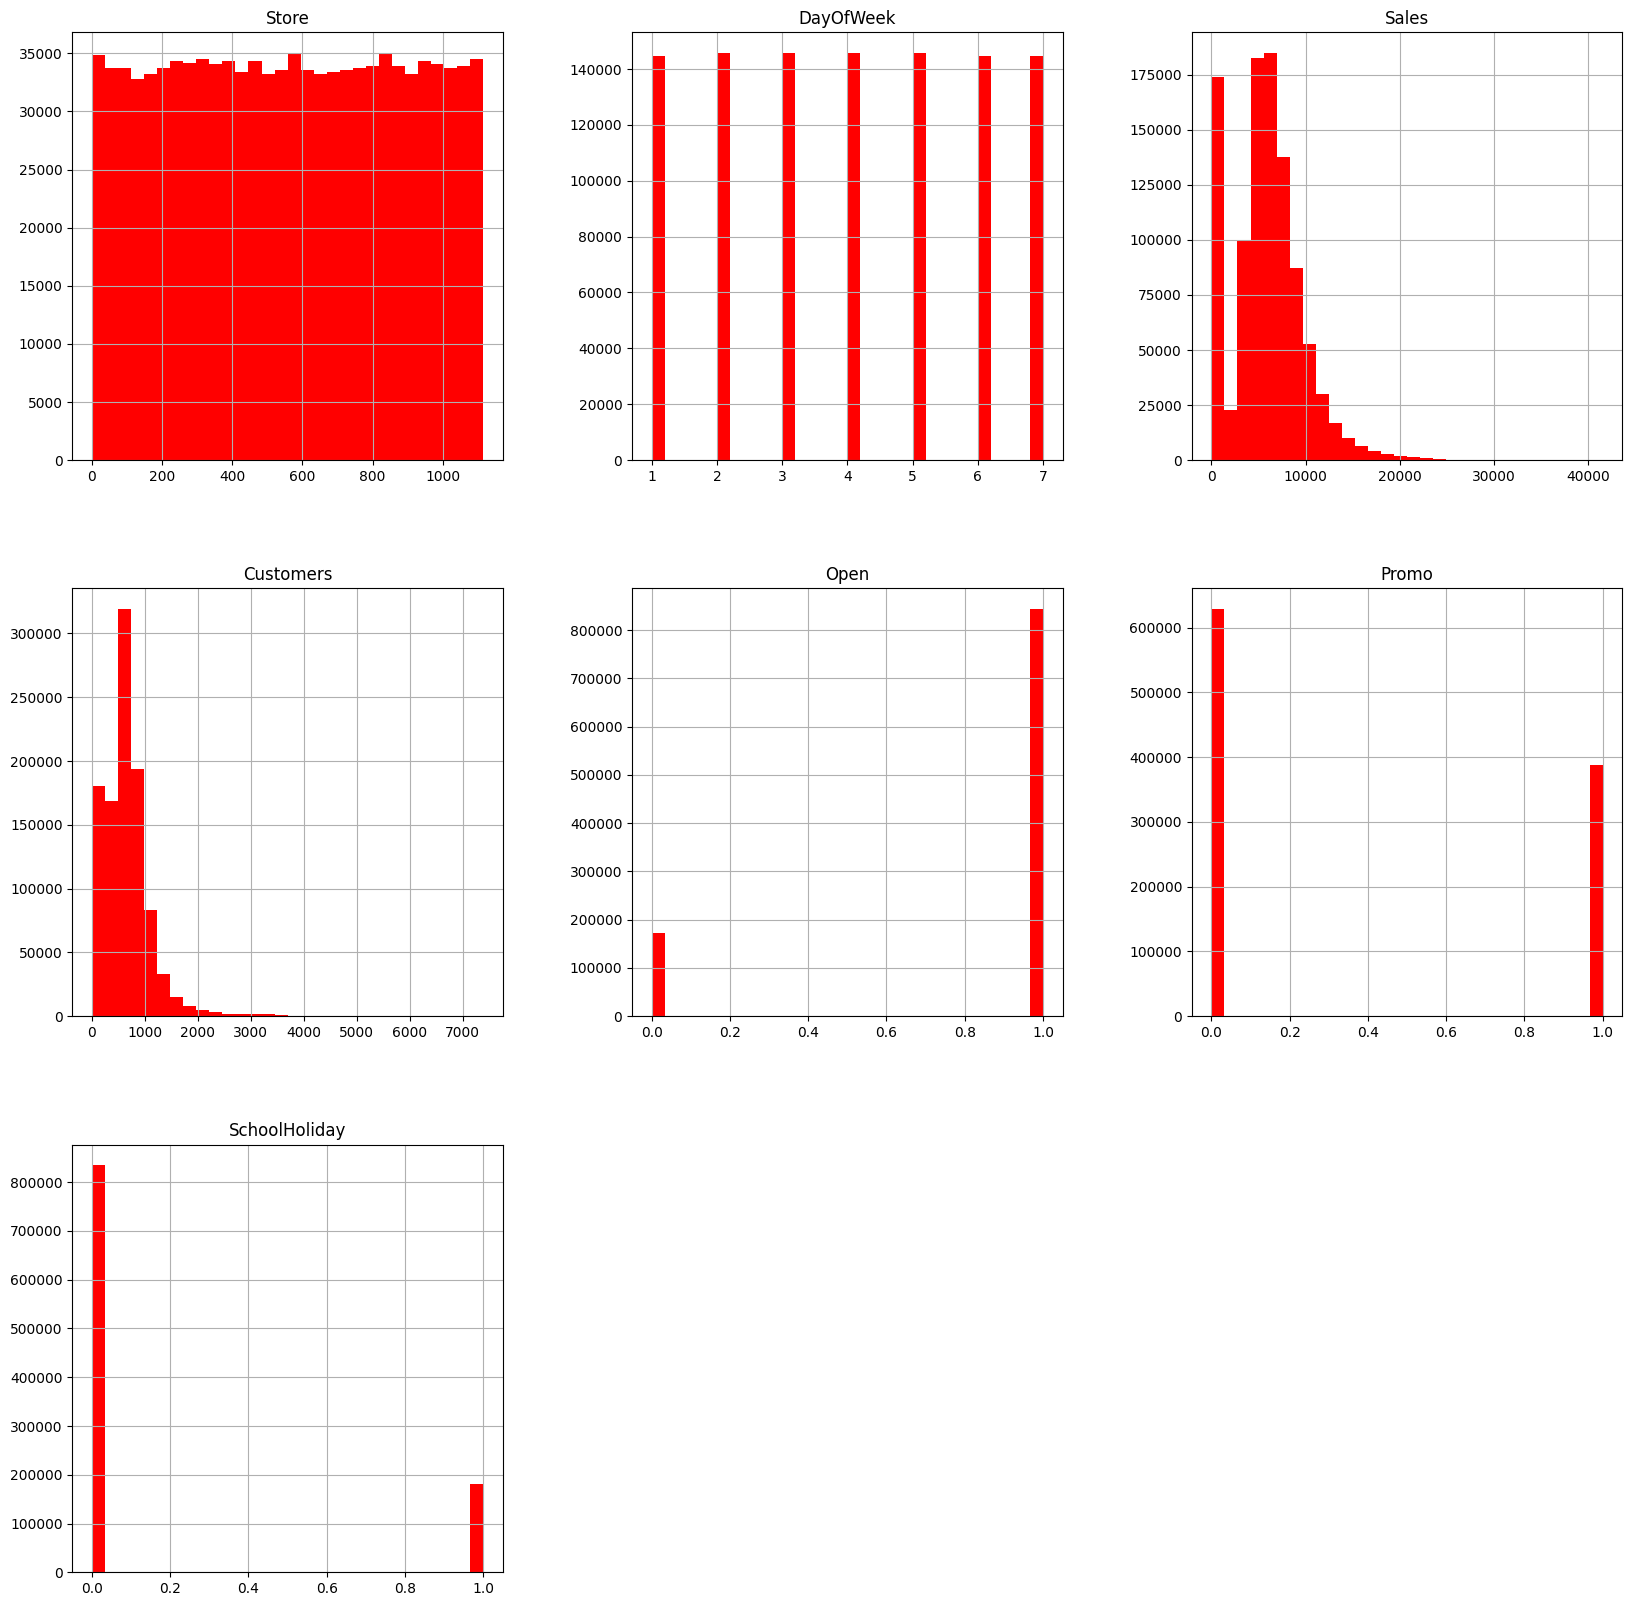

In [ ]:
#Plot histograms of the data
sales_train_df.hist(bins=30, figsize=(20,20), color='r')

* Average 600 customers per day.
* Data is equally distributed over the days of the week.
* Stores are opem 80% of the time
* Data is distributed equally distributed among all stores
* Promo runs 60% of the time
* Average sales around 5000-6000 Euros
* School holidays areound 18% of the time

In [ ]:
#check the max amount of customers
sales_train_df.Customers.max()

7388

In [ ]:
#Get the number of stores that are open and those that are closed
sales_train_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [ ]:
open_train_df = sales_train_df[sales_train_df['Open'] == 1]
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
print('Total =', len(sales_train_df))
print('Number of closed stores = ', len(closed_train_df))
print('Number of open stores = ', len(open_train_df))

Total = 1017209
Number of closed stores =  172817
Number of open stores =  844392


In [ ]:
#Drop all closed stores and keep open stores
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]
sales_train_df.shape

(844392, 9)

In [ ]:
#drop the open column
sales_train_df = sales_train_df.drop(['Open'], axis = 1)
sales_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
#Get summary
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


EDA For stores

<Axes: >

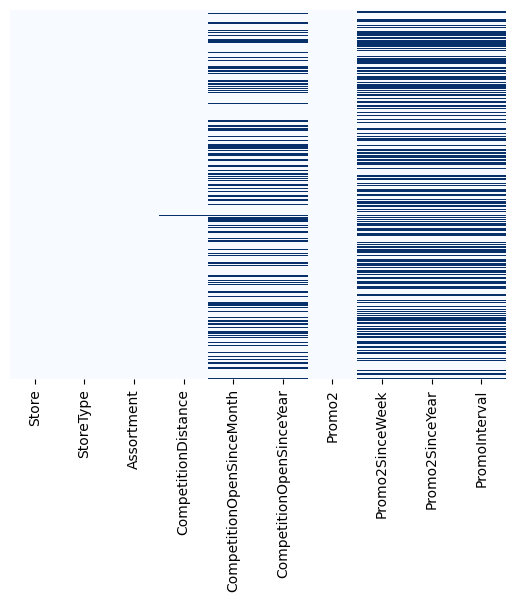

In [ ]:
#Check for missing data
sns.heatmap(store_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [ ]:
#Check for the missing values in competitionDistance
store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
#Check for the missing values in competitionDistance
store_df[store_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
#Promo 2 = 0
store_df[store_df['Promo2'] ==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


<Axes: >

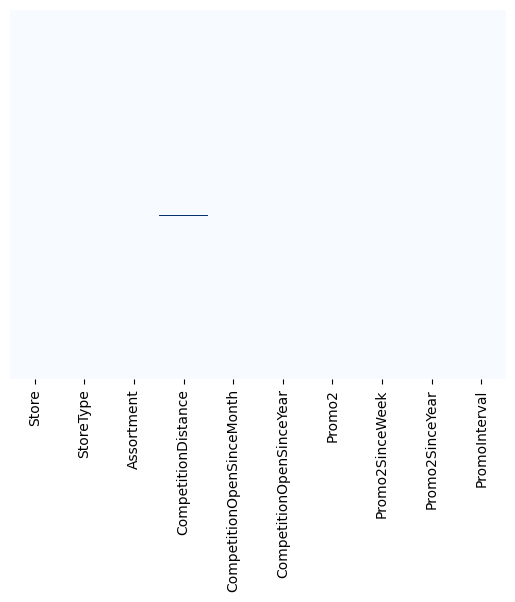

In [ ]:
#Select all columns to be filled with 0
str_col = ['Promo2SinceWeek', 'Promo2SinceYear','PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_col:
  store_df[str].fillna(0, inplace = True)

#check for missind data
sns.heatmap(store_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

<Axes: >

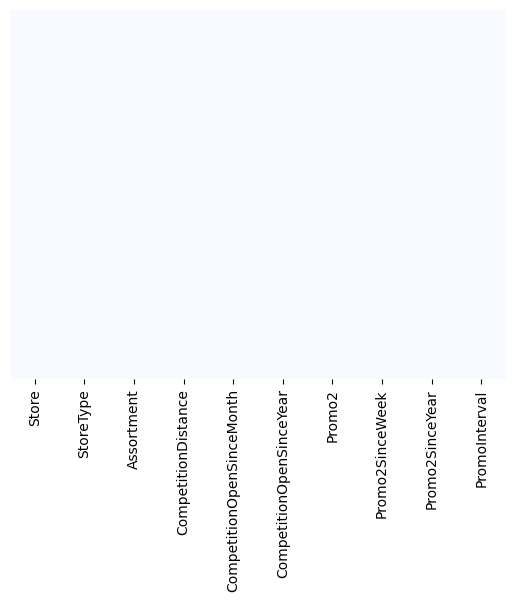

In [ ]:
#Replace the missing data with the median
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)
sns.heatmap(store_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

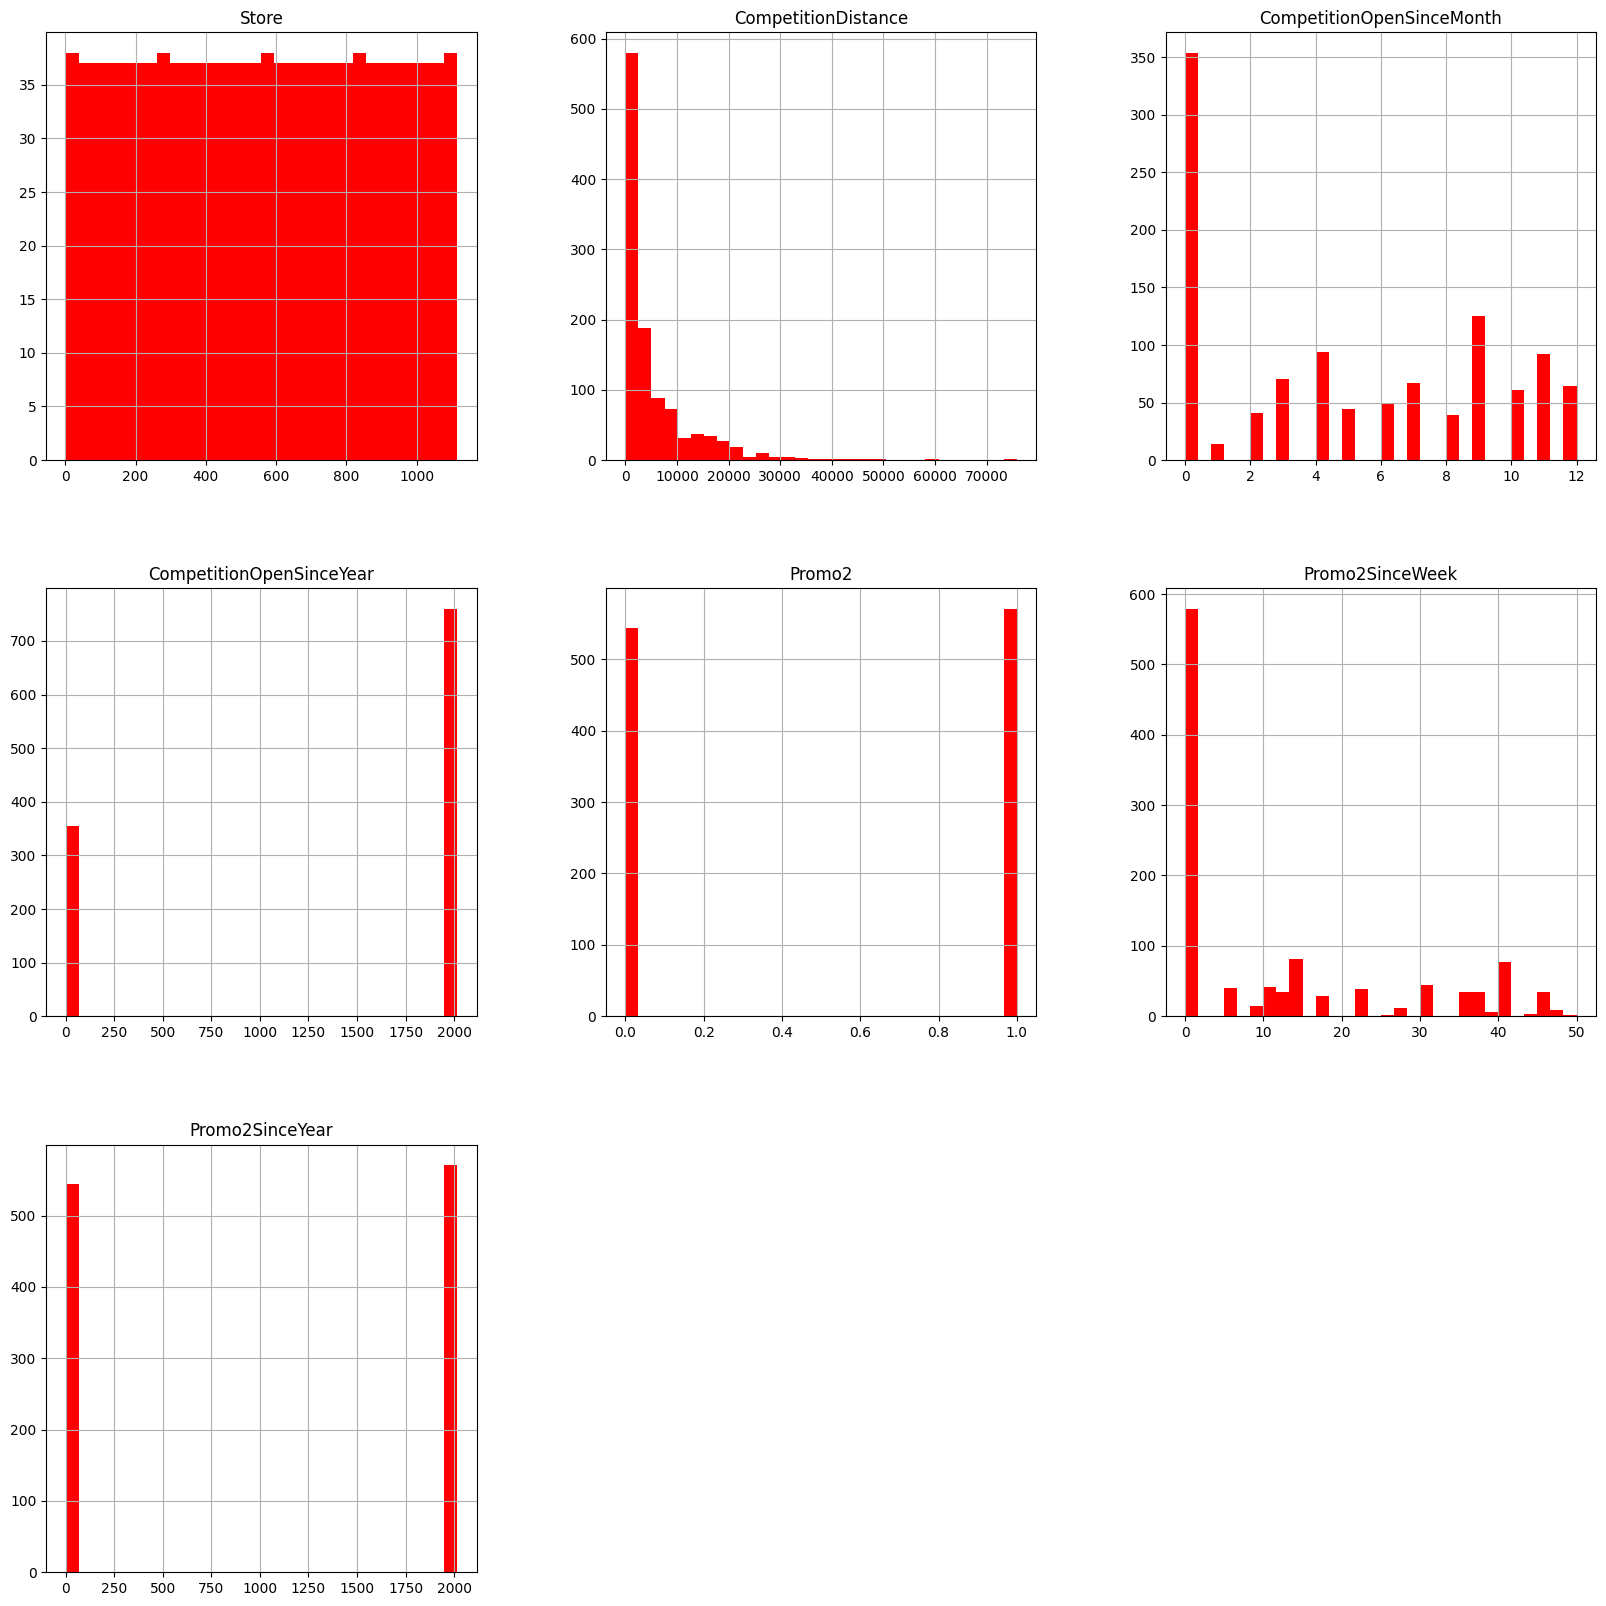

In [ ]:
#Visulize the histograms of the data
store_df.hist(bins = 30, figsize=(20,20), color = 'r')

1. Half the sore have their competition located aroind 3000m
2. Half of the store have promo 2
3. Data is equally distruted in all stores

### Merge both df

In [ ]:
# Merge both df using store
sales_train_all_df = pd.merge(sales_train_df, store_df, how ='inner',on ='Store')
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
#check the shape
sales_train_all_df.shape

(844392, 17)

In [ ]:
#Check teh correlation in the data
corr = sales_train_all_df.corr()['Sales'].sort_values()
corr

<ipython-input-27-2c548807c136>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales_train_all_df.corr()['Sales'].sort_values()


DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<ipython-input-28-c0568813e7e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all_df.corr()


<Axes: >

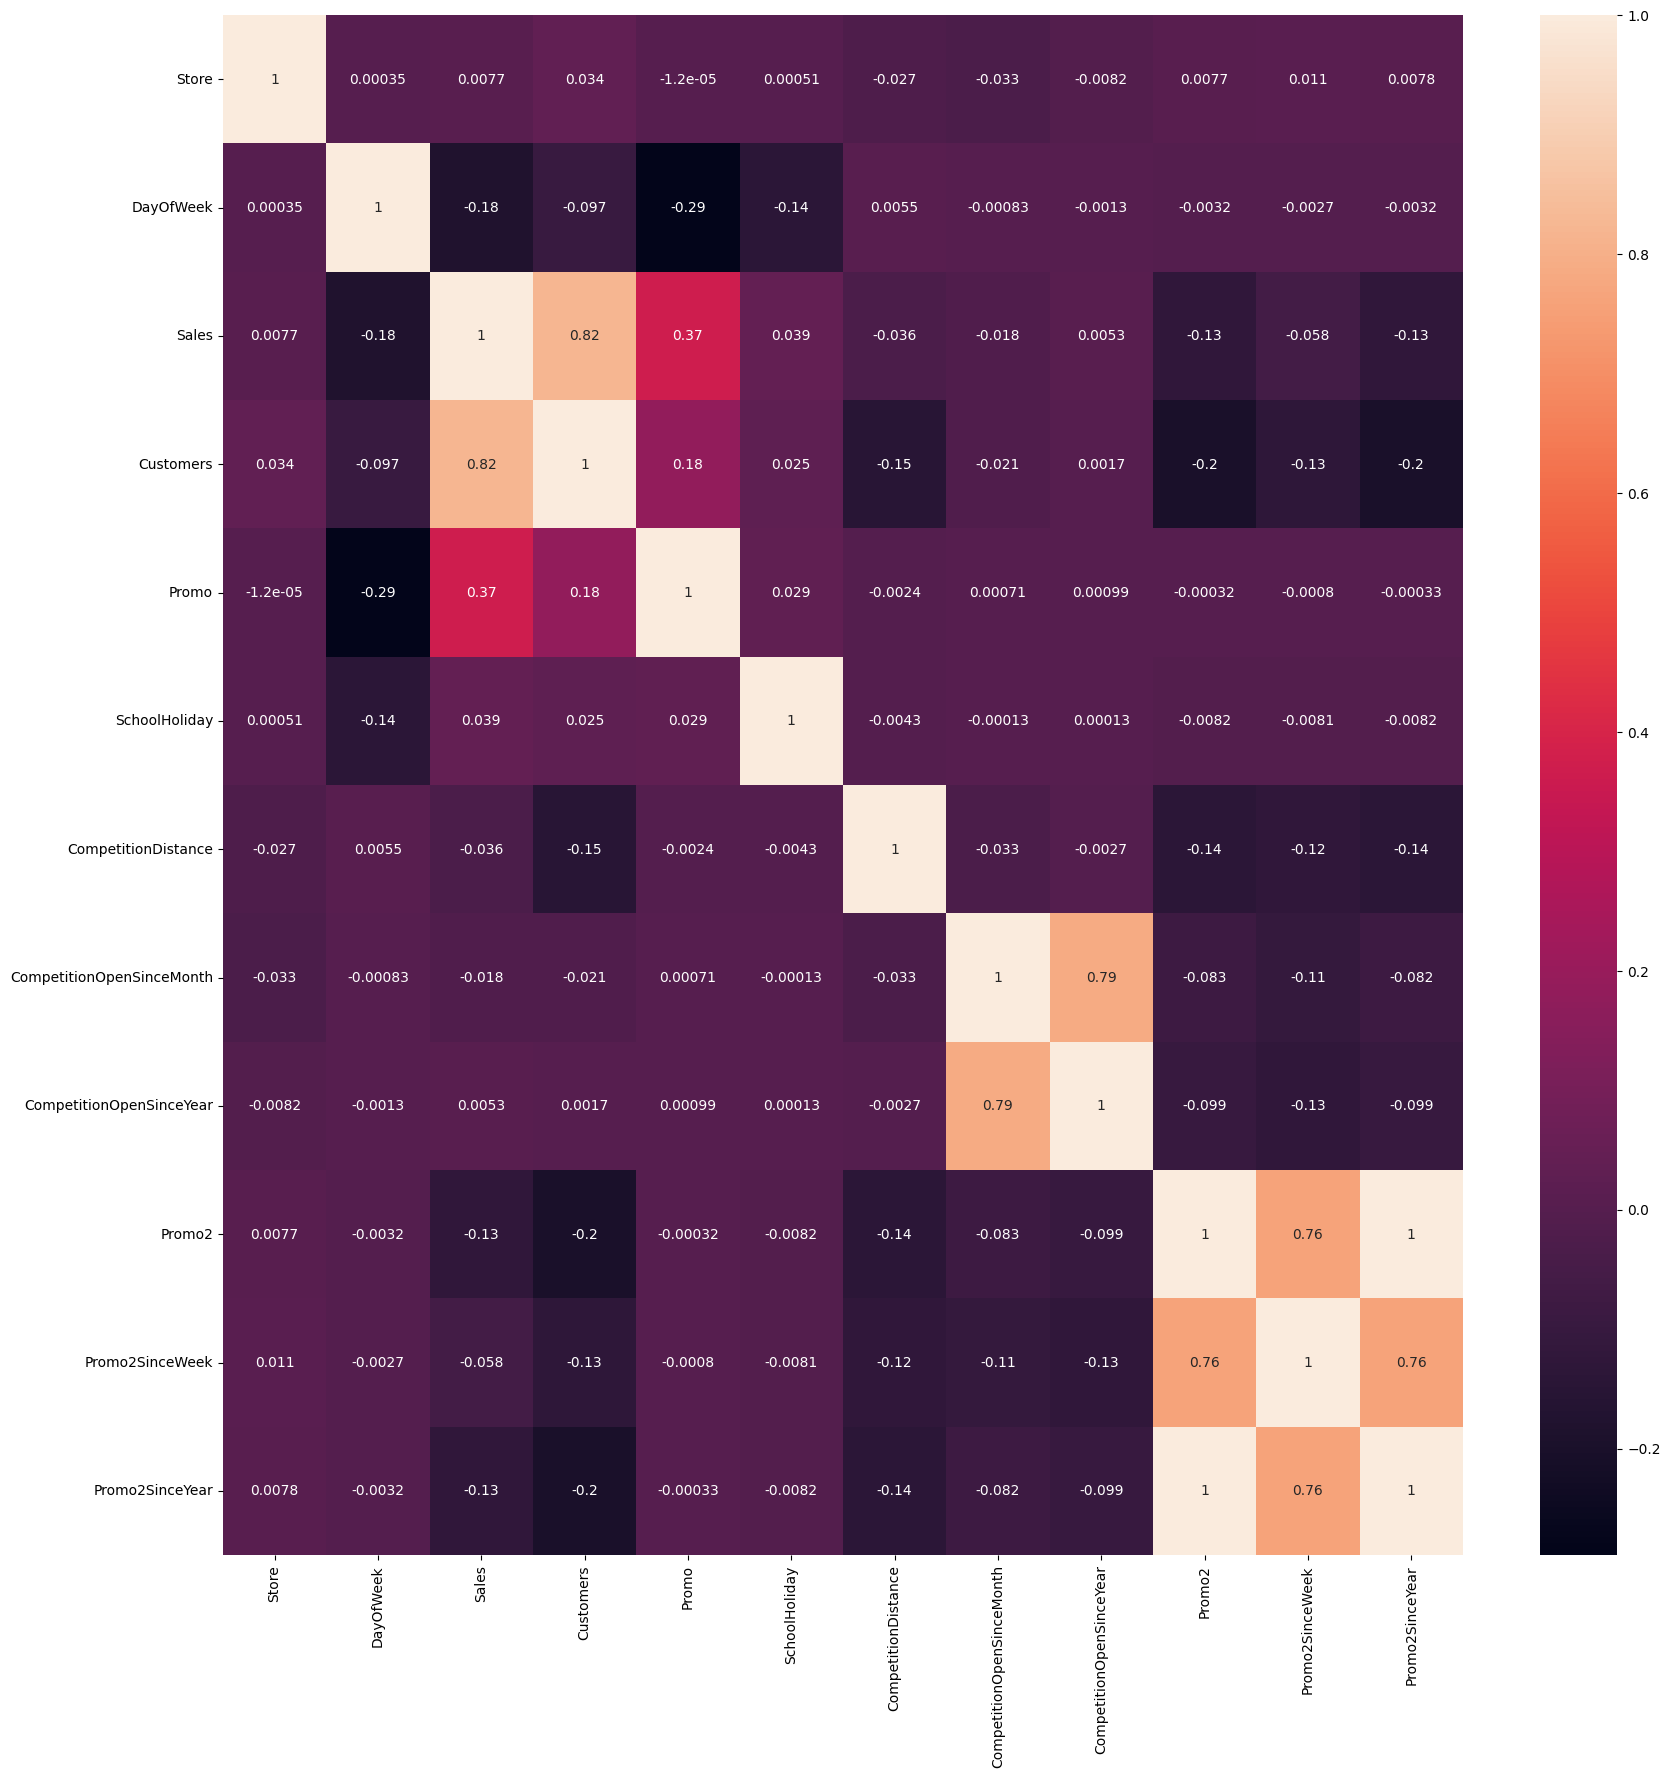

In [ ]:
#visulize all corr using heatmaps
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True)

In [ ]:
# Extract year, month and day from date column
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_df['Date']).day
sales_train_all_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

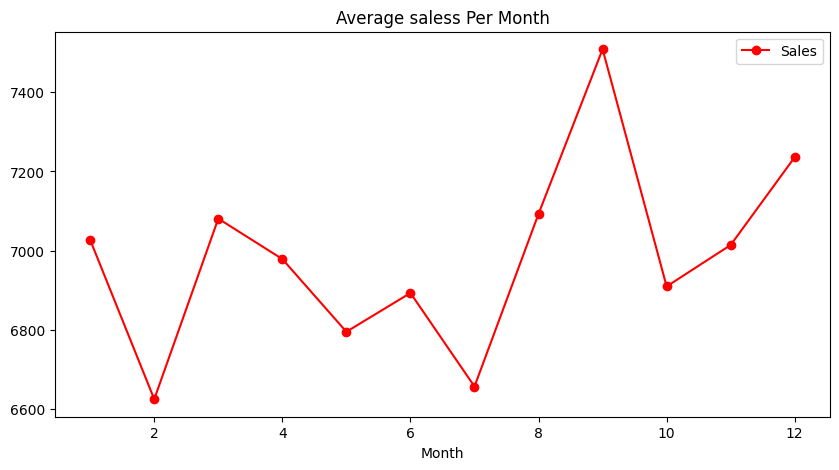

<Figure size 640x480 with 0 Axes>

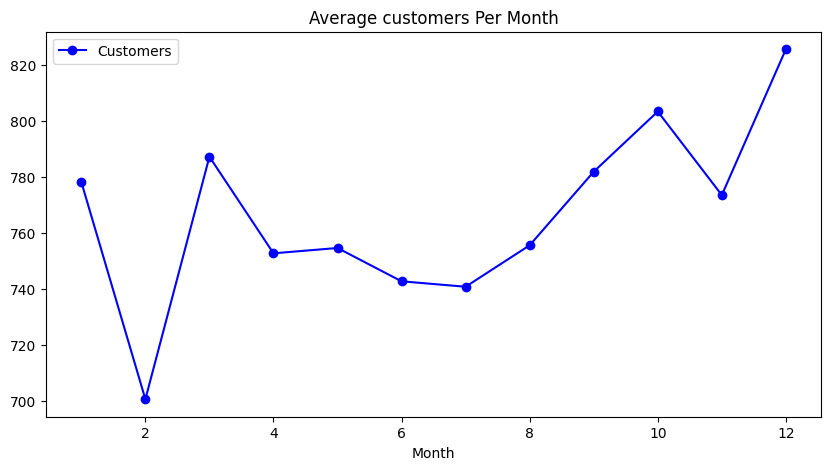

<Figure size 640x480 with 0 Axes>

In [ ]:
# Average sales and number of customers per month
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker ='o', color ='r')
axis.set_title('Average saless Per Month')
plt.figure()

axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize=(10,5), marker ='o', color ='b')
axis.set_title('Average customers Per Month')
plt.figure()

<Figure size 640x480 with 0 Axes>

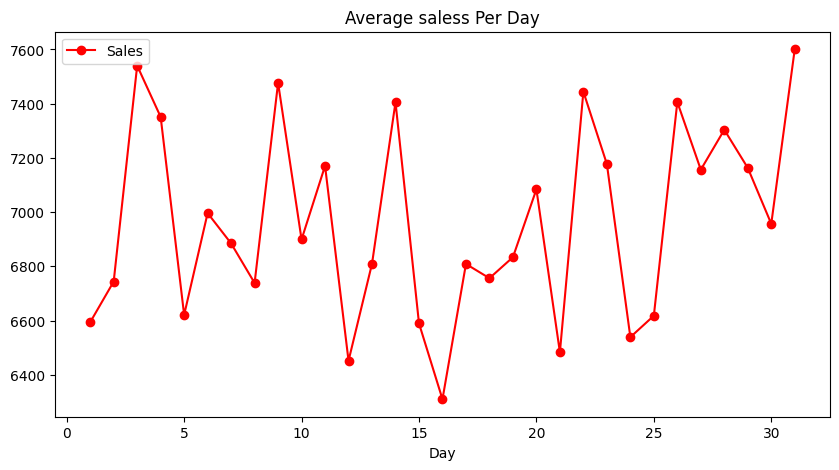

<Figure size 640x480 with 0 Axes>

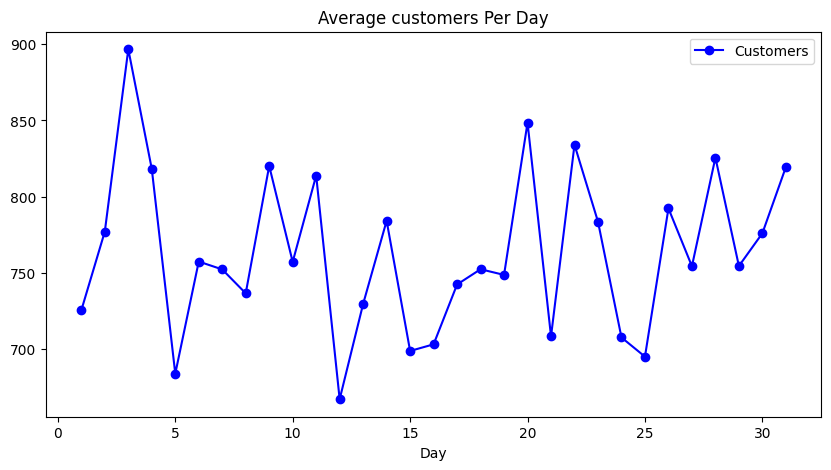

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visulize the sales and customers per day
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), marker ='o', color ='r')
axis.set_title('Average saless Per Day')
plt.figure()

axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize=(10,5), marker ='o', color ='b')
axis.set_title('Average customers Per Day')
plt.figure()

<Figure size 640x480 with 0 Axes>

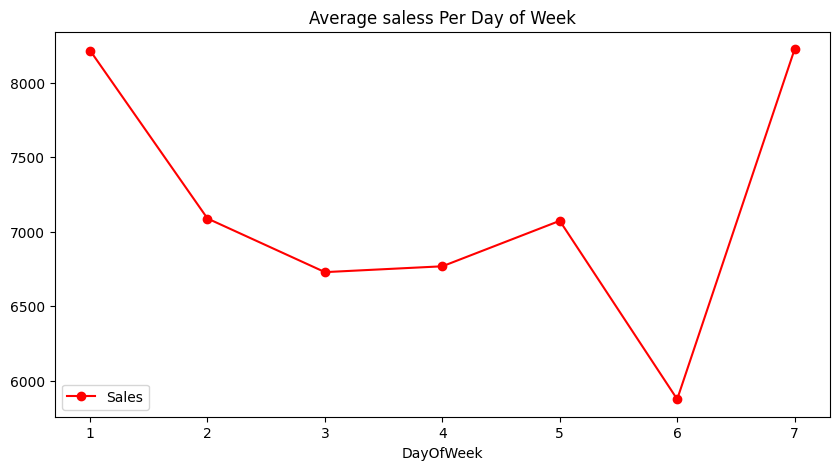

<Figure size 640x480 with 0 Axes>

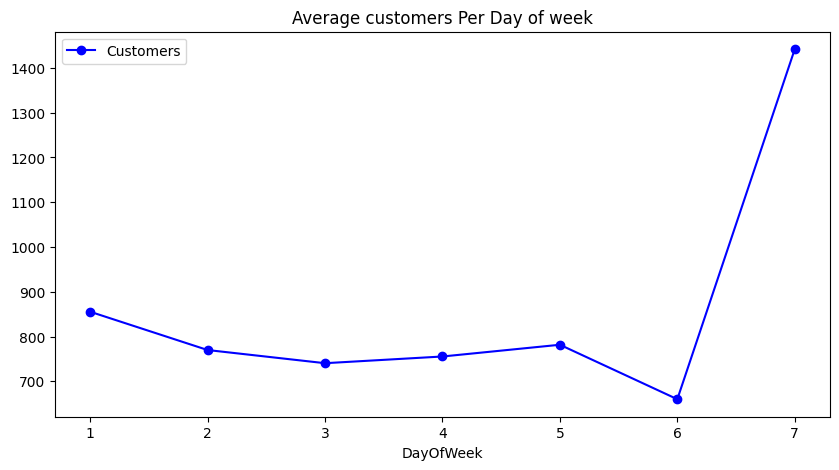

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visulize the sales and customers per day of the week
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker ='o', color ='r')
axis.set_title('Average saless Per Day of Week')
plt.figure()

axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5), marker ='o', color ='b')
axis.set_title('Average customers Per Day of week')
plt.figure()

<ipython-input-33-4cb69ab1d0e4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax=ax)


<Axes: xlabel='Date'>

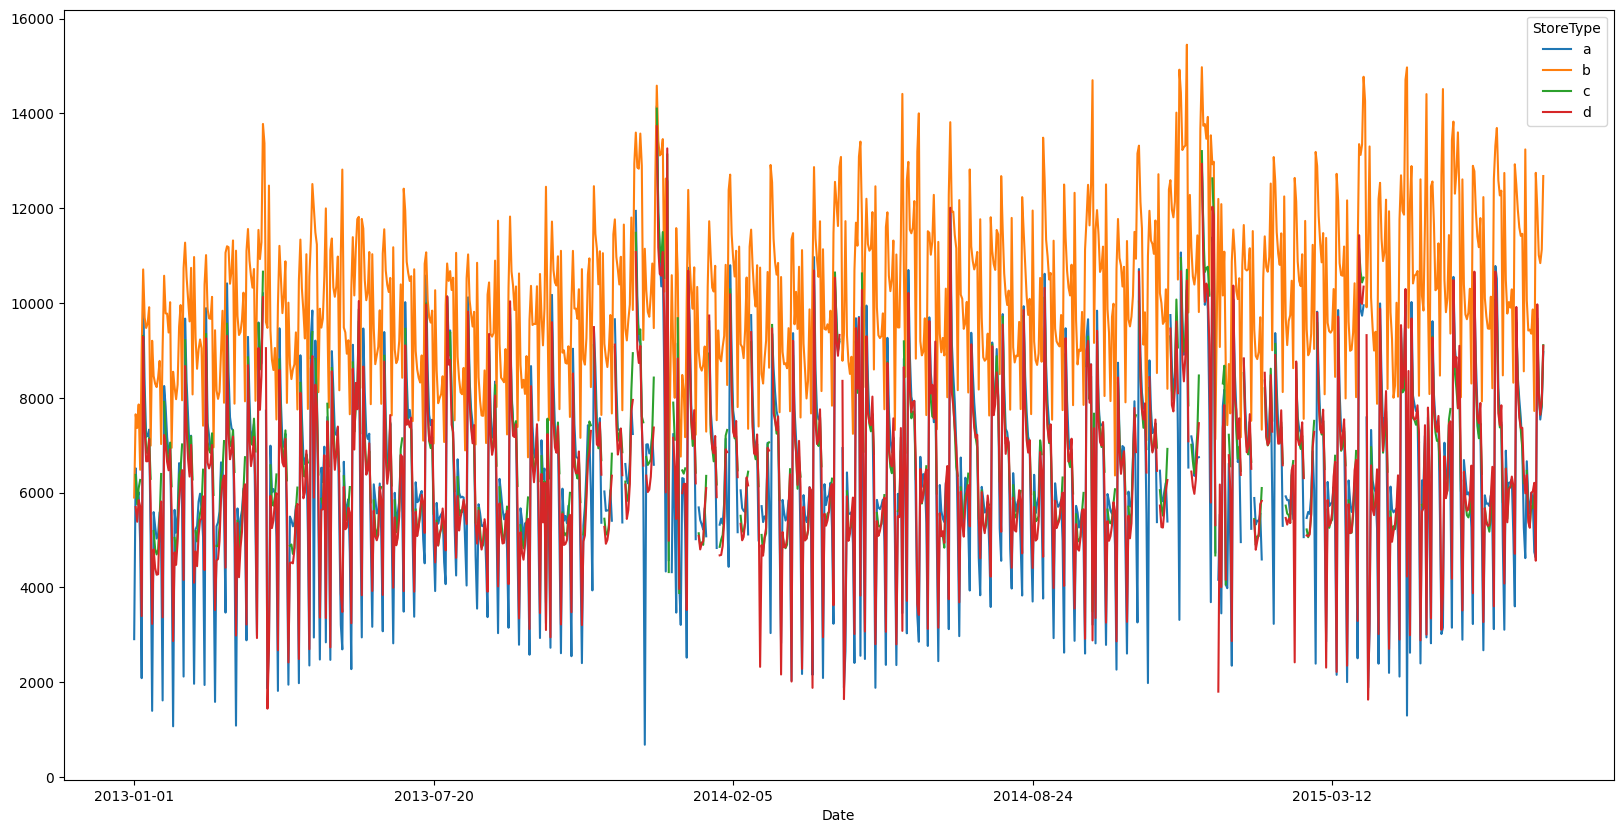

In [ ]:
#visulize the best store
fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax=ax)

<Axes: xlabel='Promo', ylabel='Customers'>

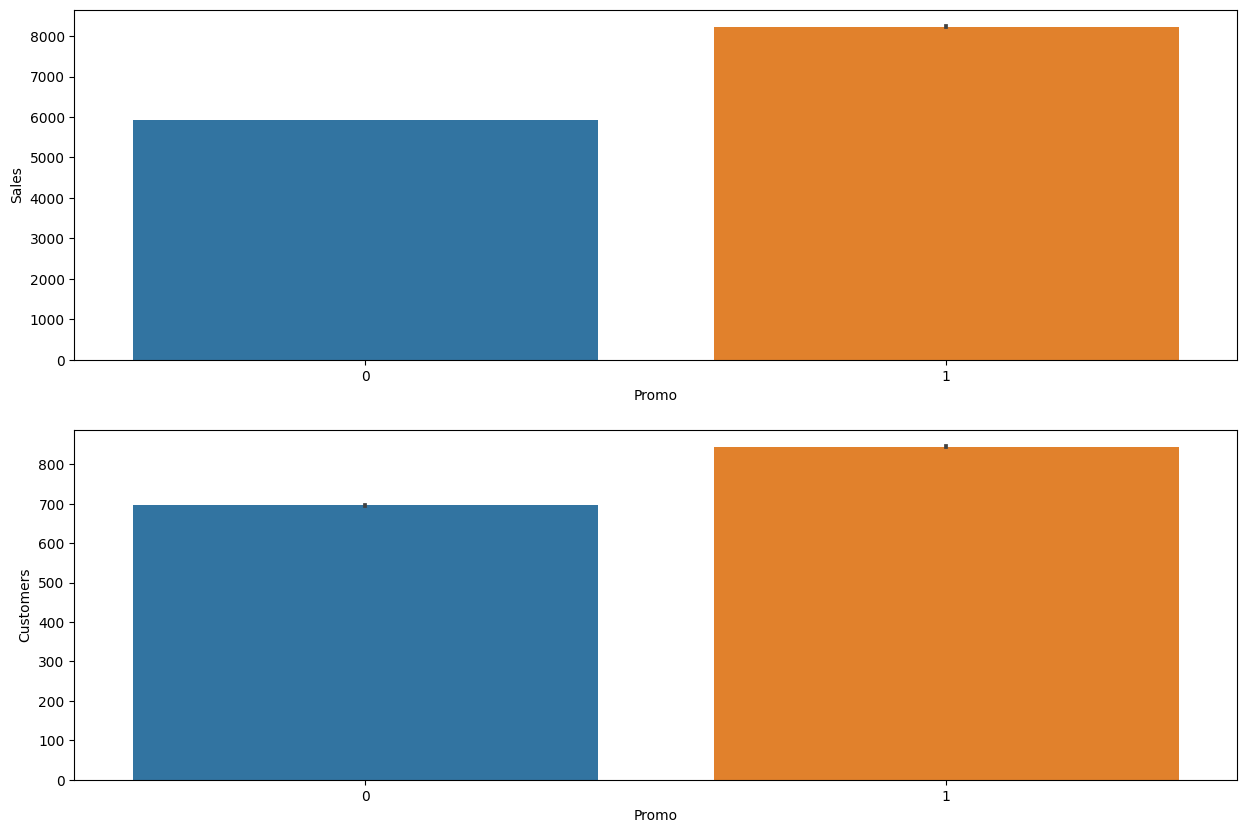

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.barplot(x='Promo', y='Sales', data = sales_train_all_df)
plt.subplot(212)
sns.barplot(x='Promo', y='Customers', data = sales_train_all_df)

<Axes: xlabel='Promo', ylabel='Customers'>

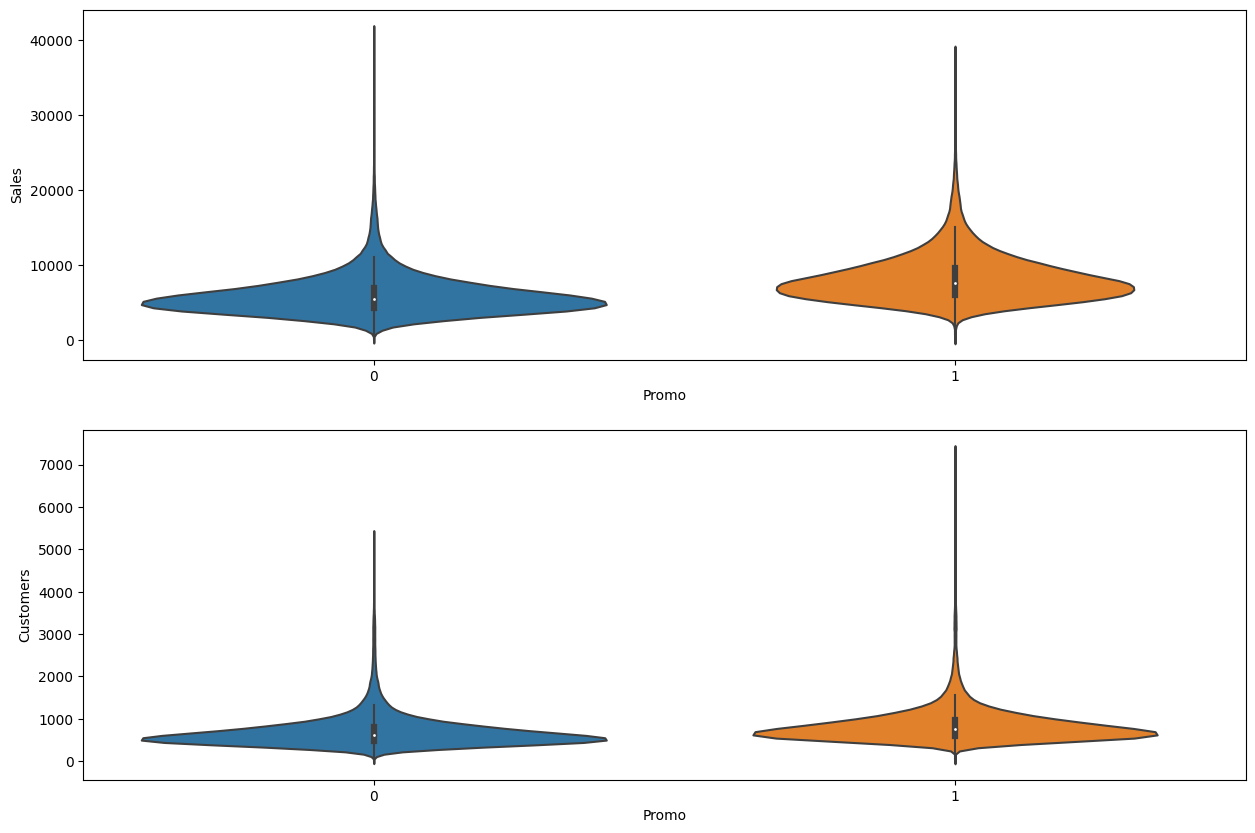

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.violinplot(x='Promo', y='Sales', data = sales_train_all_df)
plt.subplot(212)
sns.violinplot(x='Promo', y='Customers', data = sales_train_all_df)

### Facebook Prophet
*  Procedure for forecasting time series data based on ana additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
*  Works best with time series that have strong sseasonal effects and several seasons of historical data
* Implements additive regression model with 4 elements
> * A piecewise linear
> * Yearly seasonal components modeled using Fourier series
>* A weekly seasonal components
>* A holiday list




# Modelling

In [ ]:
#Install
!pip3 install pystan
!python -m pip install prophet

In [ ]:
# Import
from prophet import Prophet

In [ ]:
def sales_prediction(Store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == Store_id]
  sales_df = sales_df[['Date','Sales']]. rename(columns ={'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)

  figure = model.plot(forecast, xlabel = 'Date', ylabel ='Sales')
  figure2 = model.plot_components(forecast)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ilegh9m/bf5dwd_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ilegh9m/sedg4k5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45781', 'data', 'file=/tmp/tmp9ilegh9m/bf5dwd_p.json', 'init=/tmp/tmp9ilegh9m/sedg4k5k.json', 'output', 'file=/tmp/tmp9ilegh9m/prophet_model1l8bngn7/prophet_model-20230717102608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:26:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


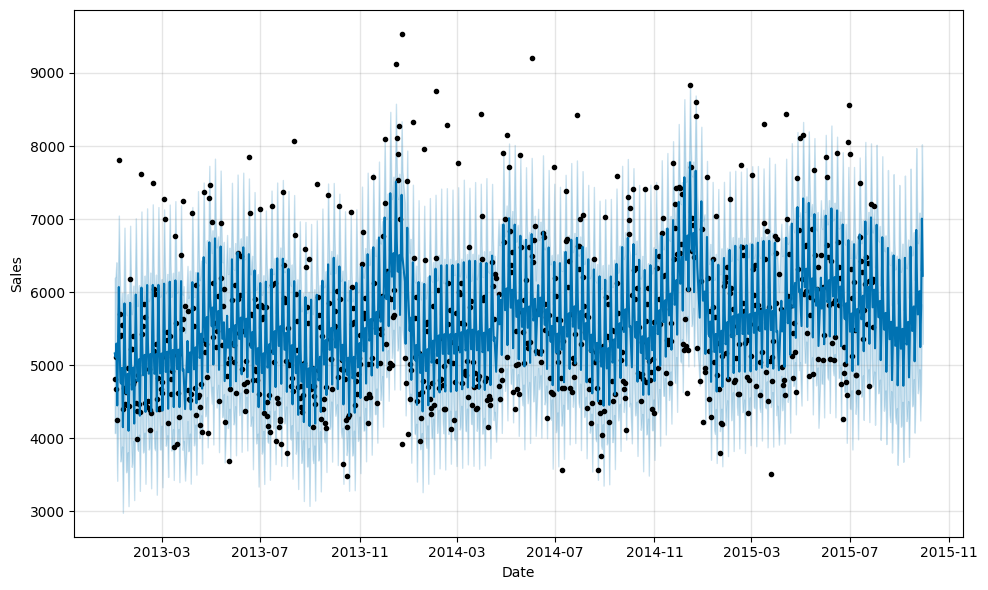

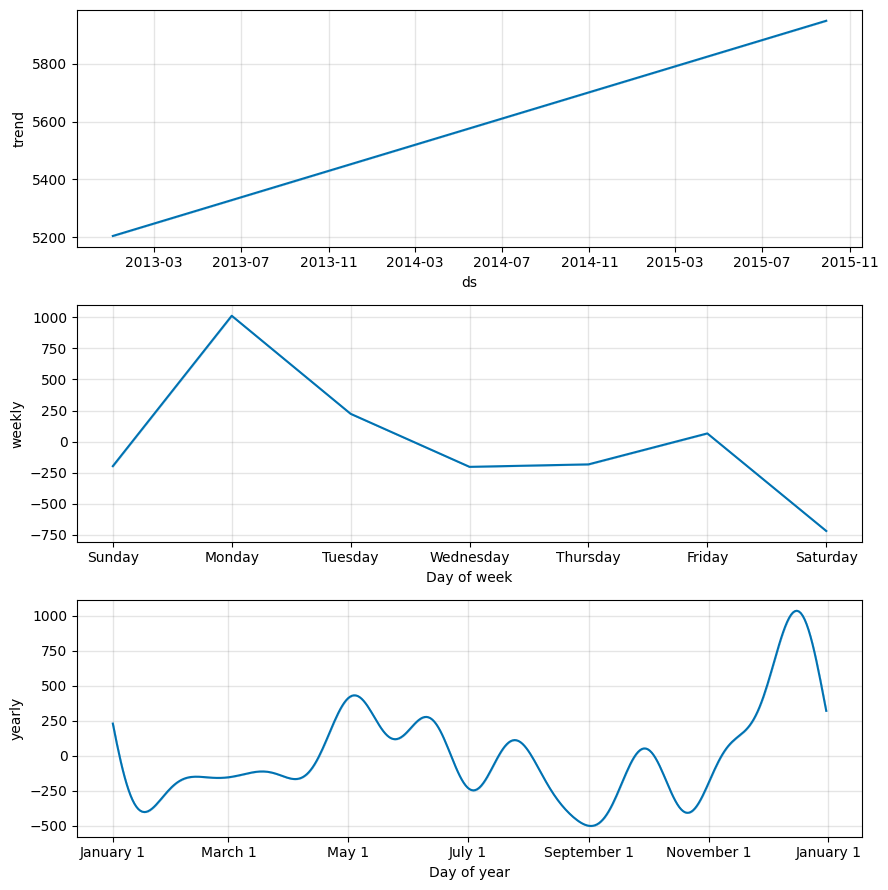

In [ ]:
df=sales_prediction(10, sales_train_all_df, 60)
df

In [ ]:
#Add holidays
def sales_prediction(Store_id, sales_df,holidays, periods):
  sales_df = sales_df[sales_df['Store'] == Store_id]
  sales_df = sales_df[['Date','Sales']]. rename(columns ={'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')

  model = Prophet(holidays = holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)

  figure = model.plot(forecast, xlabel = 'Date', ylabel ='Sales')
  figure2 = model.plot_components(forecast)

In [ ]:
#get dates for school holidays
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] ==1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [ ]:
#get dates for  state holidays
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] =='a') |
                                    (sales_train_all_df['StateHoliday'] =='b') |
                                     (sales_train_all_df['StateHoliday'] =='c')].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [ ]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday' :'state_holiday'})
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday' :'school_holiday'})

In [ ]:
#concatenate both df
school_state_holiday = pd.concat((state_holidays, school_holidays))
school_state_holiday

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ilegh9m/_0xydlf5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ilegh9m/5p7x6shp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25318', 'data', 'file=/tmp/tmp9ilegh9m/_0xydlf5.json', 'init=/tmp/tmp9ilegh9m/5p7x6shp.json', 'output', 'file=/tmp/tmp9ilegh9m/prophet_model_p4xxot4/prophet_model-20230717104312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


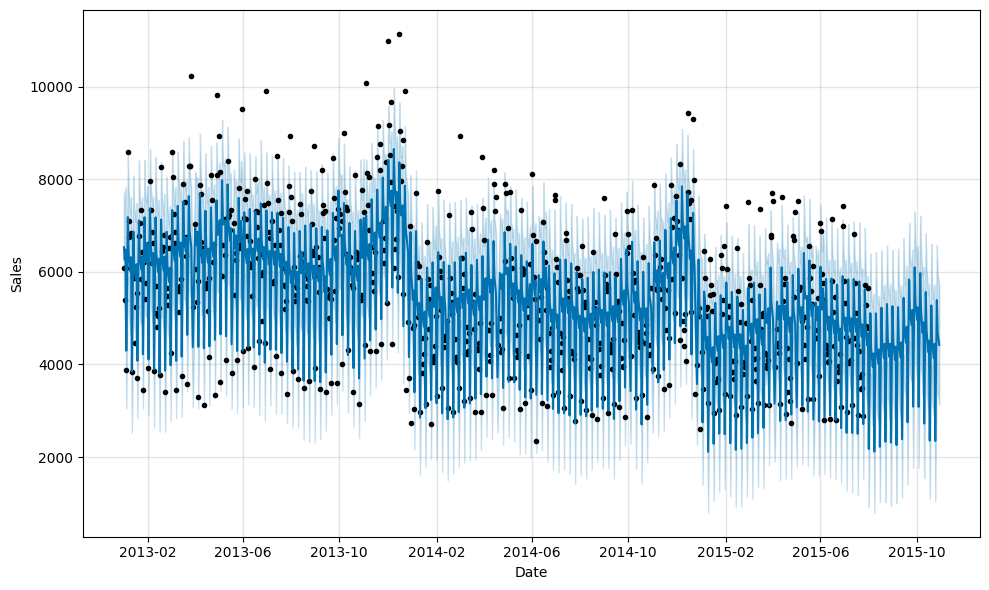

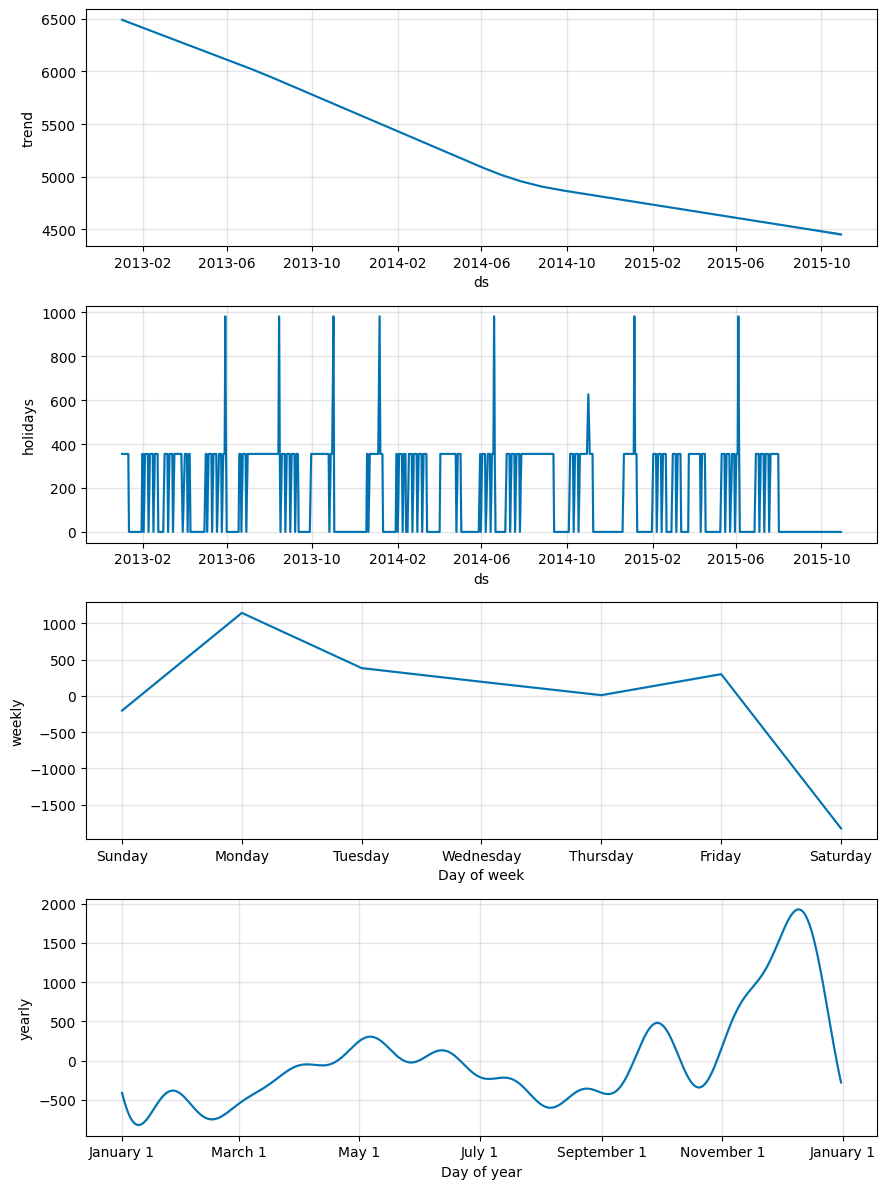

In [ ]:
#Make predictions
sales_prediction(6, sales_train_all_df, school_state_holiday, 90)